# Predicting King's County Housing Prices

## Introduction
I will be following the Cross-Industry Standard Process for Data Mining (CRISP-DM) to predict housing prices in King's County.  

CRISP-DM is a life cycle consisting of six phases:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## 1. Business Understanding
I will be building a multivariate regression on King's County house sale prices, with an ultimate goal of predicting house sale price as accurately as possible.  This exercise will be completed in the context of a private equity / real estate investment firm looking for diligence and valuation support.  

Identifying features of a home that are most likely to impact sale price can enable investment professionals to look for these features when evaluating homes for purchase.  Additionally, property managers looking to increase the value of an existing home may be able to leverage our findings to influence which renovations will be completed on a home first.

In the hands of investment professionals, this tool can be leveraged to validate assets are being purchased for proper valuations and used to maximize return realization. 

## 2. Data Understanding
This project uses the King's County House Sales dataset, a csv file containing the following columns:
* `id` - unique identifier for a house
* `date` - date house was sold
* `price` - sale price and the prediction target
* `bedrooms` - number of bedrooms/house
* `bathrooms` - number of bathrooms/bedrooms
* `sqft_living` - square footage of the home
* `sqft_lot` - square footage of the lot
* `floors` - total floors (levels) in the house
* `waterfront` - house which has a view to a waterfront
* `view` - has been viewed
* `condition` - how good the condition is (Overall)
* `grade` - overall grade given to the housing unit, based on King County grading system
* `sqft_above` - square footage of house apart from basement
* `sqft_basement` - square footage of the basement
* `yr_built` - year built
* `yr_renovated` - year when house was renovated
* `zipcode` - zipcode
* `lat` - latitude coordinate
* `long` - longitude coordinate
* `sqft_living15` - the square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - the square footage of the land lots of the nearest 15 neighbors

### Import Dataset
Now that we have a good understanding of the columns and features in the dataset, move forward with loading the dataset to continue further exploration of the data, including analysis of variable distributions, number of entries, median values, etc.  

In [27]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [28]:
# print available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [29]:
# set style of visualizations
sns.set_theme() # reset default params
plt.style.use('seaborn-darkgrid')

In [30]:
# load dataset and display first rows to ensure loaded properly
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [31]:
# display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Looking at the above, we can see that our dataset occupies just over 3.5 MB of storage, and includes 20 columns and 21,597 rows.  From first glance, we can see that some columns appear to be missing some values.  All columns appear to be numerical format (either float or int), with the exception of `date` and `sqft_basement`.  

### Initial EDA - Target Variable
Now the dataset has been successfully loaded, and its overall structure has been analyzed, going to move forward with additional EDA to unpack our variables and better understand the data available to us.  

In [32]:
# separate out target and predictors
target = df['price']
predictors = df.drop('price', axis=1)

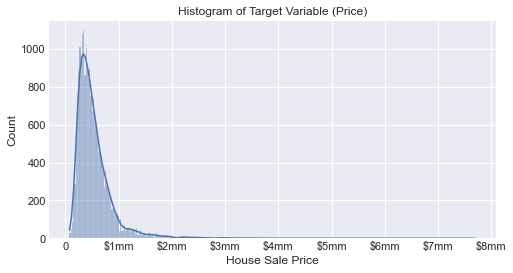

In [33]:
# display histogram of target with KDE smoothing
plt.figure(figsize=(8, 4))
ax = sns.histplot(data=target, kde=True, bins='auto')
plt.title('Histogram of Target Variable (Price)')
plt.xlabel('House Sale Price')
x_labels = ['0', '$1mm', '$2mm', '$3mm', '$4mm', '$5mm', '$6mm', '$7mm', '$8mm']
ax.set(xticks=np.linspace(0, 8000000, 9), xticklabels=(x_labels))
plt.show()

Reviewing the distribution of the target variable, `price`, we can see the majority of houses seem to fall below $2 million.  There is a significant right skew, with a number of outliers likely present with higher house sale prices.  Looking at additional summary stats will give more information on the target variable.

In [34]:
# print summary statistics and round to 2 decimals
print(f'Minimum House Sale Price: {round(target.min(), 2)}')
print(f'Maximum House Sale Price: {round(target.max(), 2)}')
print(f'Median House Sale Price: {round(target.median(), 2)}')
print(f'Mean House Sale Price: {round(target.mean(), 2)}')
print(f'House Sale Price STD: {round(target.std(), 2)}')
print(f'House Sale Price Q1: {round(target.quantile(0.25), 2)}')
print(f'House Sale Price Q3: {round(target.quantile(0.75), 2)}')

Minimum House Sale Price: 78000.0
Maximum House Sale Price: 7700000.0
Median House Sale Price: 450000.0
Mean House Sale Price: 540296.57
House Sale Price STD: 367368.14
House Sale Price Q1: 322000.0
House Sale Price Q3: 645000.0


There is quite a bit of range in our target variable, with the lowest house value coming in at \\$78k and the highest house value coming in at \\$7.7m.  The presence of outliers is evident, especially when comparing the median sale price of \\$450k with the mean sale price of \\$540k.  Standard deviation is \\$367k.  

25% percent of houses were \\$322k and less.  75% of houses were \\$645k and less.

We have a good sense of the target variable and how the majority of houses in King's County shake out in terms of sale price.  Move forward with exploring predictors and other features. 

### Initial EDA - Predictors
Start by plotting a histogram and KDE plot for each predictor to get a sense of the distributions.  Similar to the target variable above, move forward with printing summary stats as well. 

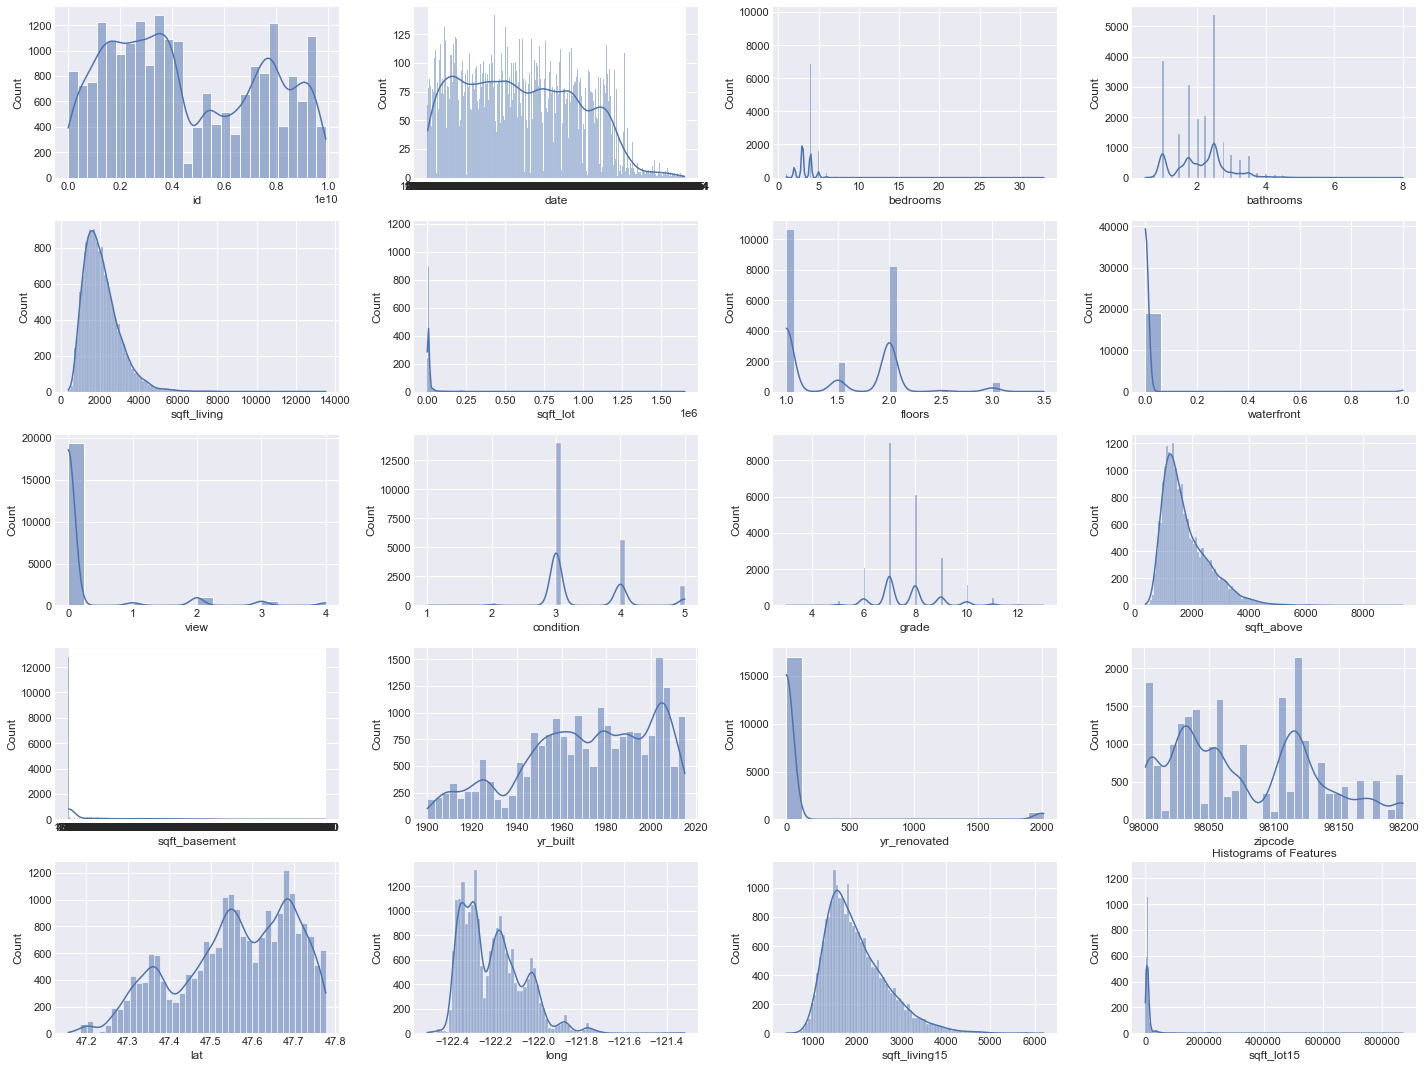

In [35]:
# set up subplots for a total of 20 plots
fig, axes = plt.subplots(nrows = 5, ncols=4, figsize=(20, 15))
for ax, feat in zip(axes.flatten(), predictors.columns):
    sns.histplot(data=predictors[feat], kde=True, ax=ax, bins='auto') 
plt.tight_layout()
plt.title('Histograms of Features')
plt.show()

This gives us a high-level view of our predictors and how they roughly are distributed. While this visualization is helpful for most variables, there are some where the data is either too zoomed out or there were some issues when pulling in x-axis values.  Replot histograms of select variables to fix plotting issues and help further analyze distributions.

Observations:
* `id`: scale is likely skewing results, further exploration is necessary, but this column will likely be dropped as it is just a unique identifier. 
* `date`: x-axis is unreadable, but looks like there is a drop off in data of houses sold recently if data is aligned by time as presented. 
* `bedrooms`: Majority seeem to fall between 1 and 5. Likely outliers with higher values. 
* `bathrooms`: Majority fall between 1 and 4, with some outliers above 4.  
* `sqft_living`: Unimodal, with the majority of values falling between 0 and 5000 sqft. Right skew is present. 
* `sqft_lot`: Hard to interpret from this view, will benefit from a replot
* `floors`: Spikes at 1 and 2 floors, with smaller spikes at 1.5 and 3.0. 
* `waterfront`: Majority seem to have 0 values, corresponding with not having waterfront views.
* `view`: The majority have been viewed 0 times, with slight bumps at 2.0 and 3.0 views. 
* `condition`: Majority of KC houses appear to have condition ratings of 3.0, with a large number of houses also receiving 4.0 and 5.0 condition ratings. 
* `grade`: Majority of KC houses appear to have grades between 6 and 10. 
* `sqft_above`: Unimodal around 2000 sqft with right skew. 
* `sqft_basement`: Large number of 0 values, hard to interpret axis from this view. 
* `yr_built`: The majority of houses in the dataset appear to have been built from 2000 onward, with the oldest house represented being built in 1990.  
* `yr_renovated`: Large number of 0 values and a bump of values around 2000.  May have been a trend of renovations around 2000.  
* `zipcode`: Some variation, with the most common zipcodes between 100 and 150 -- will need to explore this further.
* `lat`: Looks trimodal with centers between 0.3 and 0.4, 0.5 and 0.6, and around 0.7.
* `long`: Looks trimodal as well, with the majority of values between -2.4 and -2.0
* `sqft_living15`: majority of values close to 2000 sq ft, with some right skew
* `sqft_lot15`: significant right skew, will benefit from replotting.

In [36]:
# convert date to datetime column and replot 
predictors['datetime'] = pd.to_datetime(predictors['date'], infer_datetime_format=True)

# drop initial date column
predictors = predictors.drop('date', axis=1)

In [37]:
# explore sqft_basement to understand why not plotting
predictors['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
906.0         1
602.0         1
1816.0        1
1920.0        1
652.0         1
Name: sqft_basement, Length: 304, dtype: int64

We can see that there are `?` values within the sqft_basement column.  These are causing issues.  Given informatino is missing for these and there are only 454 of them, we will remove these entries for now.  

In [38]:
# concat consolidated df and remove `?` values
df = pd.concat([target, predictors], axis=1)
df = df.loc[df['sqft_basement'] != '?']

In [40]:
# change type of sqft_basement
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [41]:
# separate out target and predictors
target = df['price']
predictors = df.drop('price', axis=1)

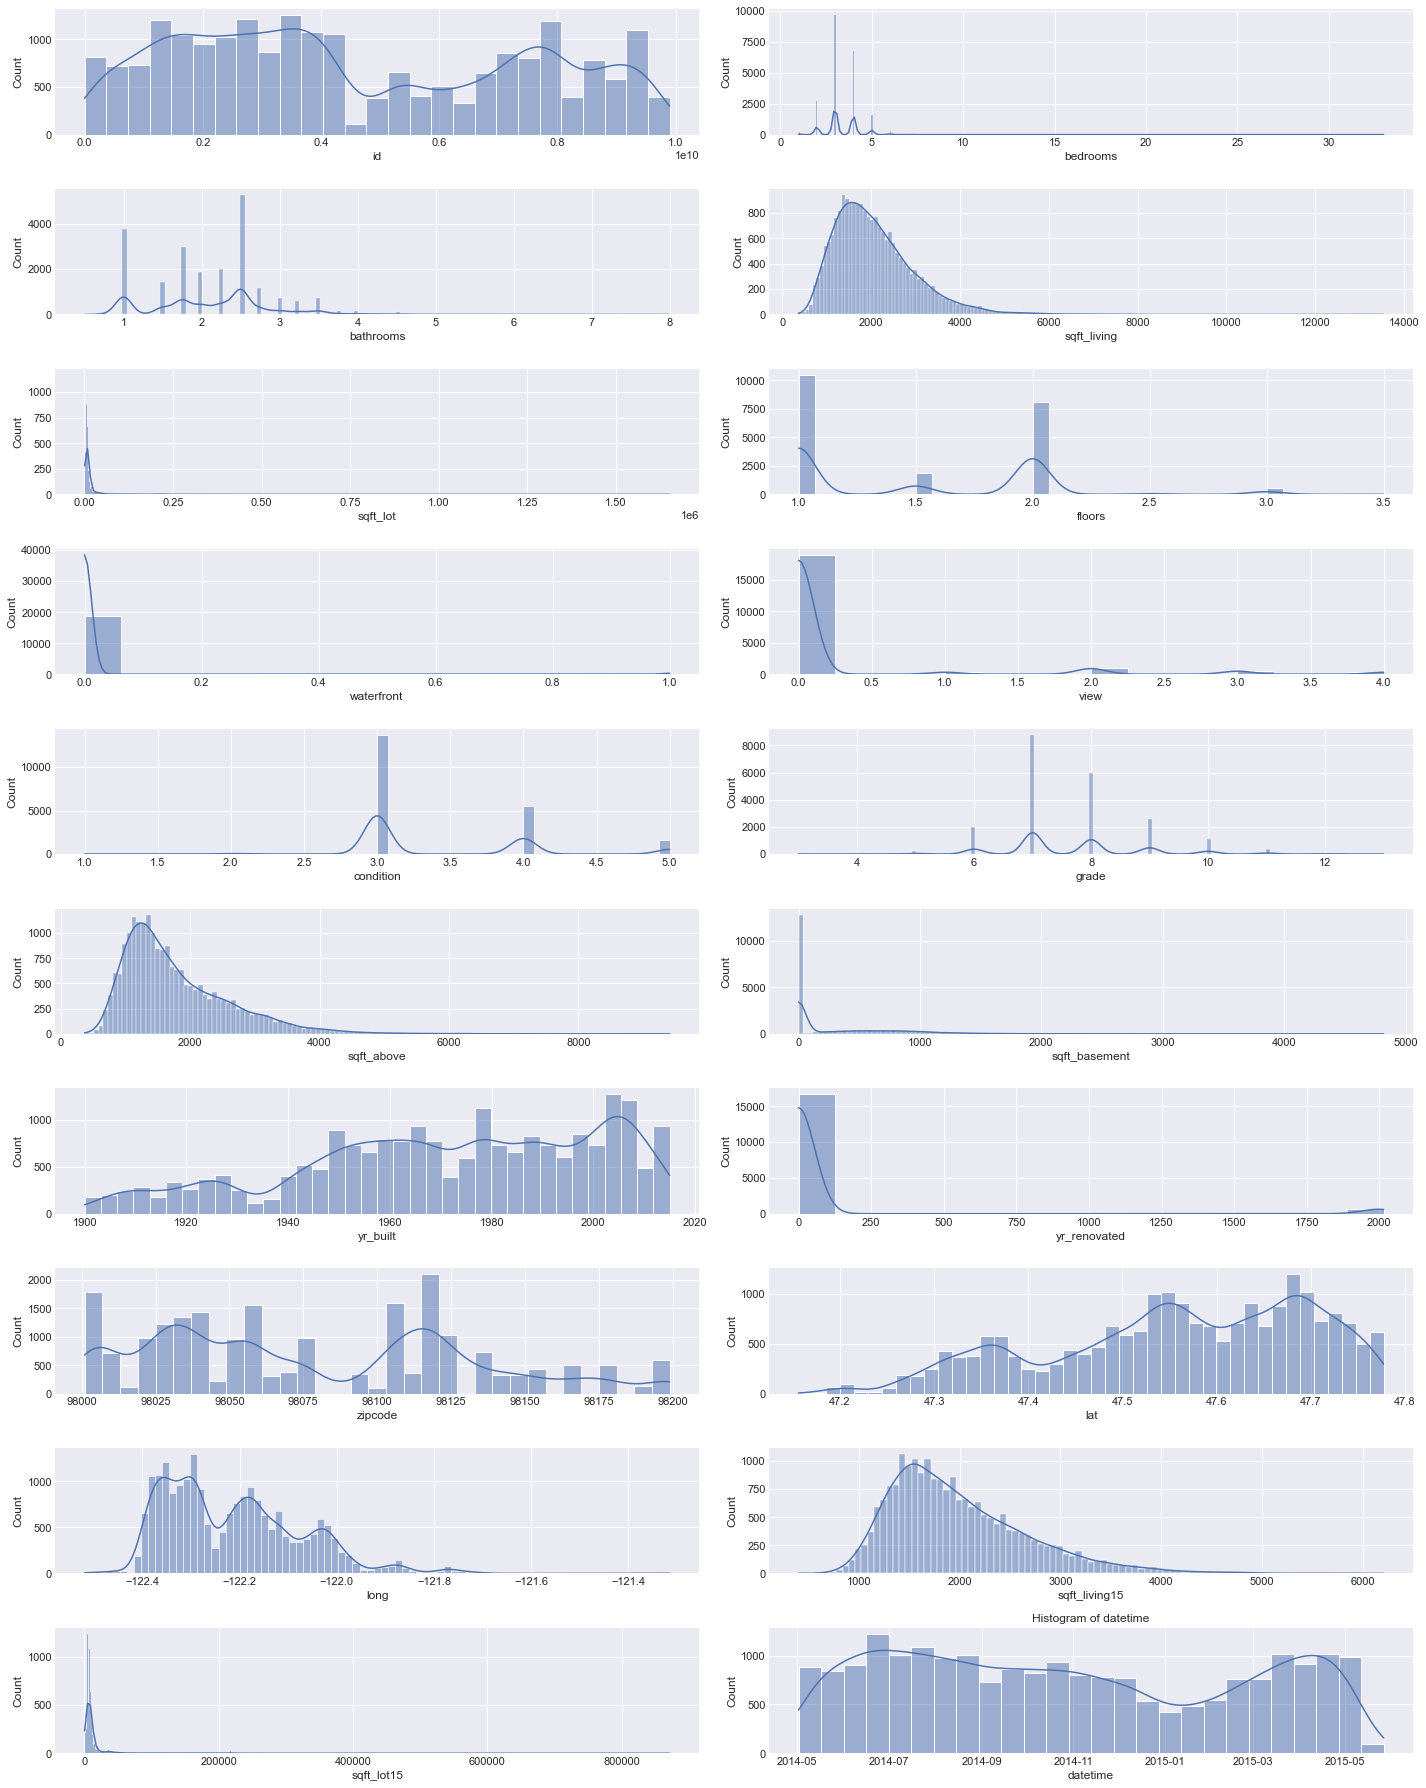

In [45]:
# replot histograms and kde plots, this time only using 2 columns
fig, axes = plt.subplots(nrows = 10, ncols=2, figsize=(20, 25))
for ax, feat in zip(axes.flatten(), predictors.columns):
    sns.histplot(data=predictors[feat], kde=True, ax=ax, bins='auto')
    plt.title(f'Histogram of {feat}')
plt.tight_layout()
plt.show()

Replotting the histograms of our features, we see many of the issues we saw before are fixed now, and we are able to explore the distributions further of our features.  Move forward with plotting summary statistics to understand range of values, median and most common values, and standard deviations.  

In [49]:
# print summary statistics
predictors.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,18804.000000,21082.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,17389.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.007552,0.233327,3.409923,7.658279,1789.069006,291.851724,1971.023223,82.991949,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.086573,0.765066,0.650498,1.174253,828.409769,442.498337,29.321938,398.481819,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


Replotting the histograms of our features, we see many of the issues we saw before are fixed now, and we are able to explore the distributions further of our features.

Observations:
* `id`: Again, not very helpful given this is just a unique identifier
* `bedrooms`: We see the majority of KC houses have 1 to 5 bedrooms, with some outliers having more than 5.  The median number of bedrooms in KC is 3.   
* `bathrooms`: The majority of KC houses have less than 3 bathrooms, with houses having 1 or 2.5 bathrooms being most common. The median is 2.25, with 75% of all houses in the dataset having 2.5 bathrooms or fewer. 
* `sqft_living`: Median living size is just under 2000 sq. ft at 1,910 sq.ft.  75% of KC houses have houses with 2,550 sq. ft. and less. 
* `sqft_lot`: The presence of outliers is clear, given the small unimodal bump close to 0, with a significant right skew.  Median lot size is 7,620 sqft. 
* `floors`: 75% of houses in KC have 2 floors or fewer.  The highest house has 3.5 floors.
* `waterfront`: Very few houses in KC have waterfront views
* `view`: Most houses in KC have not been viewed
* `condition`: Median condition is 3 - seems we have a good representation of mid-condition homes. 
* `grade`: Median house grade is 7, with a max grade of 13 in the dataset.  Minimum grade is 3 - - seems the scale may have been shifted to remove 0 grades by 3 to the right. 
* `sqft_above`: Median sqft above is 1,560 sq. ft, with 75% of all KC houses having sqft above of 2,210 or less
* `sqft_basement`: A large number of houses do not have basements
* `yr_built`: The earliest KC house in the dataset was built in 1900, the earlies built in 2015.  Median yr_built is 1975.  75% of all houses were built in 1997 or prior. 
* `yr_renovated`: Majority have not been renovated. 
* `zipcode`: Good range of values
* `lat`: see notes above
* `long`: see notes above
* `sqft_living15`: median of 1,840, max of 6,210 sqft. 
* `sqft_lot15`: median of 7,626 sqft., max of 871,200 sqft. (this may be a mistake, definitely an outlier at the minimum). 
* `datetime`: We see date sold ranges from May 2014 to May 2015

Now that we have a solid understanding of the data available to us, and have explored the distributions of target and predictor variables, move forward with preparing the data for modeling.  

## 3. Data Preparation
Starting with the raw dataset, clean and prepare the dataset for regression, ensuring assumptions for linear regression are not violated along the way. 

In [52]:
# import raw dataset
raw_df = pd.read_csv('data/kc_house_data.csv')

# display df info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We know from data understanding phase that we can drop the `id` column.  Additionally, we know we will have to handle the `?` values found within the `sqft_basement` column.  Finally, we will have to convert the date column to datetime.  We will start with these clean-ups prior to moving to additional preprocessing steps. 

In [55]:
# drop id column
clean_df = raw_df.drop('id', axis=1)

# drop ? values from sqft_basement - there are only a few
clean_df = clean_df.loc[clean_df['sqft_basement'] != '?']

# convert sqft_basement to float
clean_df['sqft_basement'] = clean_df['sqft_basement'].astype('float64')

# create datetime column from date and drop original date column
clean_df['date_sold'] = pd.to_datetime(clean_df['date'], infer_datetime_format=True)
clean_df = clean_df.drop('date', axis=1)

Now that initial clean-ups identified during the data understanding stage have been made, move forward with checking the dataset for additional clean-up items, starting with checking for additional missing values. 

### Handle Missing Values

In [58]:
# print number of missing values in each col
clean_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date_sold           0
dtype: int64

Further explore the missing values to arrive at the best way of handling.  Starting with `waterfront`, we see there is a significant percent of all data that is missing a `waterfront` value, so simply removing these from the dataset is not feasible. Similar with the missing values in `yr_renovated` - there are too many to simply remove.  

In a slightly different scenario is `view`, which is only missing 61 values. Before handling, start with the missing `waterfront` values. 

In [81]:
# separate out missing values
missing_waterfront = clean_df.loc[clean_df['waterfront'].isna()]
missing_view = clean_df.loc[clean_df['view'].isna()]
missing_yr_reno = clean_df.loc[clean_df['yr_renovated'].isna()]

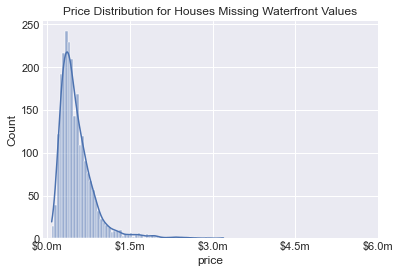

In [111]:
# explore distribution of target variable for missing_waterfront values
ax = sns.histplot(data=missing_waterfront['price'], kde=True, bins='auto')

# relabel xticks for ease of reading
xticks = np.linspace(0, 6000000, 5)
xticklabels = [f'${xtick/1000000}m' for xtick in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

# add title and fix axis labels
plt.title('Price Distribution for Houses Missing Waterfront Values')
plt.show()

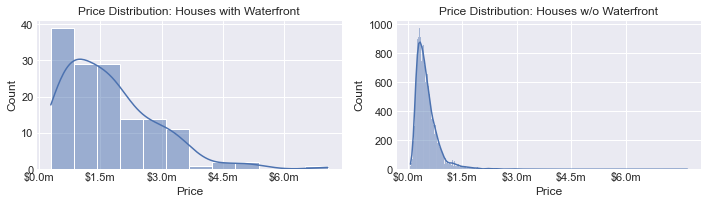

In [112]:
# compare distribution of price to those where waterfront=1 and =0
yes_water = clean_df.loc[clean_df['waterfront'] == 1.0]
no_water = clean_df.loc[clean_df['waterfront'] == 0.0]

# xticks and labels
xticks = np.linspace(0, 6000000, 5)
xticklabels = [f'${xtick/1000000}m' for xtick in xticks]

# display with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
for ax, water_df in zip(axes.flatten(), [yes_water, no_water]):
    sns.histplot(data=water_df['price'], kde=True, ax=ax, bins='auto')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel('Price')
axes[0].title.set_text('Price Distribution: Houses with Waterfront')
axes[1].title.set_text('Price Distribution: Houses w/o Waterfront')
plt.tight_layout()
plt.show()

Comparing the price distribution of houses with waterfront and without waterfront to the values in our dataset that are missing values, we see that these missing values have price characteristics aligning to houses without waterfront.  This makes logistical sense also, as houses without waterfront values likely imply the house does not have waterfront.  Going forward, we will set missing waterfront values to 0.

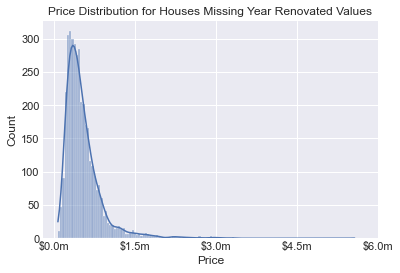

In [115]:
# repeat process for yr_renovated
ax = sns.histplot(data=missing_yr_reno['price'], kde=True, bins='auto')

# relabel xticks for ease of reading
xticks = np.linspace(0, 6000000, 5)
xticklabels = [f'${xtick/1000000}m' for xtick in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

# add title and fix axis labels
plt.title('Price Distribution for Houses Missing Year Renovated Values')
plt.xlabel('Price')
plt.show()

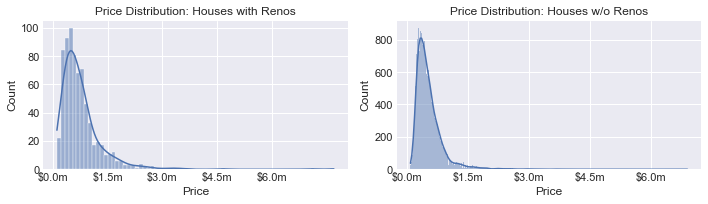

In [114]:
# compare distribution of price to those where waterfront=1 and =0
yes_reno = clean_df.loc[clean_df['yr_renovated'] > 0.0]
no_reno = clean_df.loc[clean_df['yr_renovated'] == 0.0]

# xticks and labels
xticks = np.linspace(0, 6000000, 5)
xticklabels = [f'${xtick/1000000}m' for xtick in xticks]

# display with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
for ax, reno_df in zip(axes.flatten(), [yes_reno, no_reno]):
    sns.histplot(data=reno_df['price'], kde=True, ax=ax, bins='auto')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel('Price')
axes[0].title.set_text('Price Distribution: Houses with Renos')
axes[1].title.set_text('Price Distribution: Houses w/o Renos')
plt.tight_layout()
plt.show()

Similar to waterfront, we see missing `yr_renovated` values are more inline with houses that have not undergone any sort of renovation.  The price distributions are more similar and it makes more sense that a house with a missing value is one that has not recevied a reno. Going forward, all missing values will be replaced with 0.

In [120]:
# look at value counts of last column with missing values, view
display(clean_df['view'].value_counts())
display(clean_df['view'].value_counts(normalize=True))

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

0.0    0.902097
2.0    0.044113
3.0    0.023527
1.0    0.015511
4.0    0.014752
Name: view, dtype: float64

As we noted above, the majority of houses have not been viewed.  Only 10% of houses have been viewed.  Given the number missing data is only 61, a rather miniscule amount, we will move forward dropping these from the dataset.  

In [121]:
# Fill missing values
clean_df['waterfront'] = clean_df['waterfront'].fillna(value=0)
clean_df['yr_renovated'] = clean_df['yr_renovated'].fillna(value=0)

# confirm view is the only column missing values
clean_df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             61
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
date_sold         0
dtype: int64

In [123]:
# drop remaining missing values
clean_df = clean_df.dropna()

In [129]:
# confirm there are no remaining missing values
clean_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_sold        0
dtype: int64

### Check for Duplicates

In [127]:
# check for and handle duplicates if necessary
clean_df.duplicated().sum()

0

There are no duplicated values in the dataset.  Move forward with handling column types.

### Convert Column Types